### Import dependencies

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Set up training data

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Create the model

### Build a layer

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

In [5]:
model = tf.keras.Sequential([l0])

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

### Compile the model, with loss and optimizer functions

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

### Train the model

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


### Display training statistics

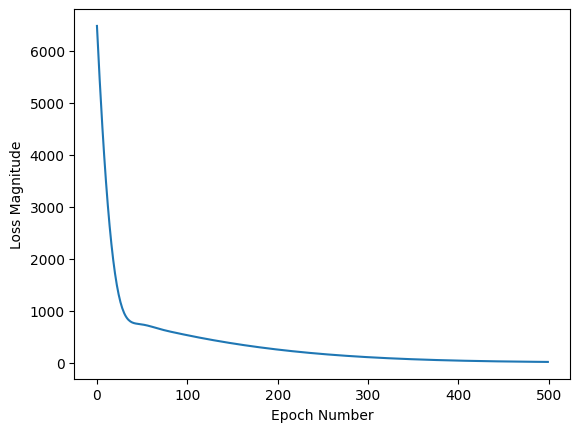

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

### Use the model to predict values

In [10]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 83ms/step
[[211.28954]]


### Looking at the layer weights

In [11]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-0.12163281]], dtype=float32), array([0.], dtype=float32)]


### More

In [12]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 69ms/step
[[211.74745]]
1/1 [==============================] - 0s 48ms/step
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[-0.10108373, -0.06669588, -0.14702626, -0.7181147 ]],
      dtype=float32), array([ 2.9260142, -2.3204896,  2.743031 , -3.4194767], dtype=float32)]
These are the l1 variables: [array([[-0.48402315,  0.7609936 ,  0.25890863, -0.6990919 ],
       [-0.09049002, -0.32980195, -0.65253466,  0.5400909 ],
       [-0.693352  ,  0.01114403,  0.02145179, -0.9475998 ],
       [-0.09594682, -0.946191  , -1.1085914 ,  1.2751617 ]],
      dtype=float32), array([-0.95669025,  1.9047345 ,  2.270343  , -3.3781638 ], dtype=float32)]
These are the l2 variables: [array([[ 0.10341286],
       [ 0.31118935],
       [ 0.3855064 ],
       [-1.7099984 ]], dtype=float32), array([3.2450237], dtype=float32)]
